In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeRegressor

In [4]:
train = pd.read_csv(r"C:\Users\Ong Yi Kai\Desktop\Data\Kaggle competitions\Tabular Data Jul 2021\train.csv",date_parser=True)

In [5]:
#look at first five rows of data
train.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [7]:
#retrive Basic Information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB


In [13]:
#check for null values
train.isnull().any()

date_time                 False
deg_C                     False
relative_humidity         False
absolute_humidity         False
sensor_1                  False
sensor_2                  False
sensor_3                  False
sensor_4                  False
sensor_5                  False
target_carbon_monoxide    False
target_benzene            False
target_nitrogen_oxides    False
dtype: bool

In [16]:
#check for duplicated data
train.duplicated().any()

False

In [23]:
date = train.iloc[:,0]
data = train.iloc[:,1:-3]
target = train.iloc[:,-3:]
feature_name = data.columns

In [24]:
vt = VarianceThreshold(threshold=0.0)
vt.fit(data)

var =pd.DataFrame(vt.variances_,index=data.columns, columns=['Variance'])
var.sort_values('Variance', ascending=False, axis=0,inplace=True)
var

,Variance
sensor_4,2360.900000
sensor_5,2351.900000
sensor_3,2256.800000
sensor_2,1938.600000
sensor_1,1468.000000
relative_humidity,81.900000
deg_C,44.800000
absolute_humidity,0.159139


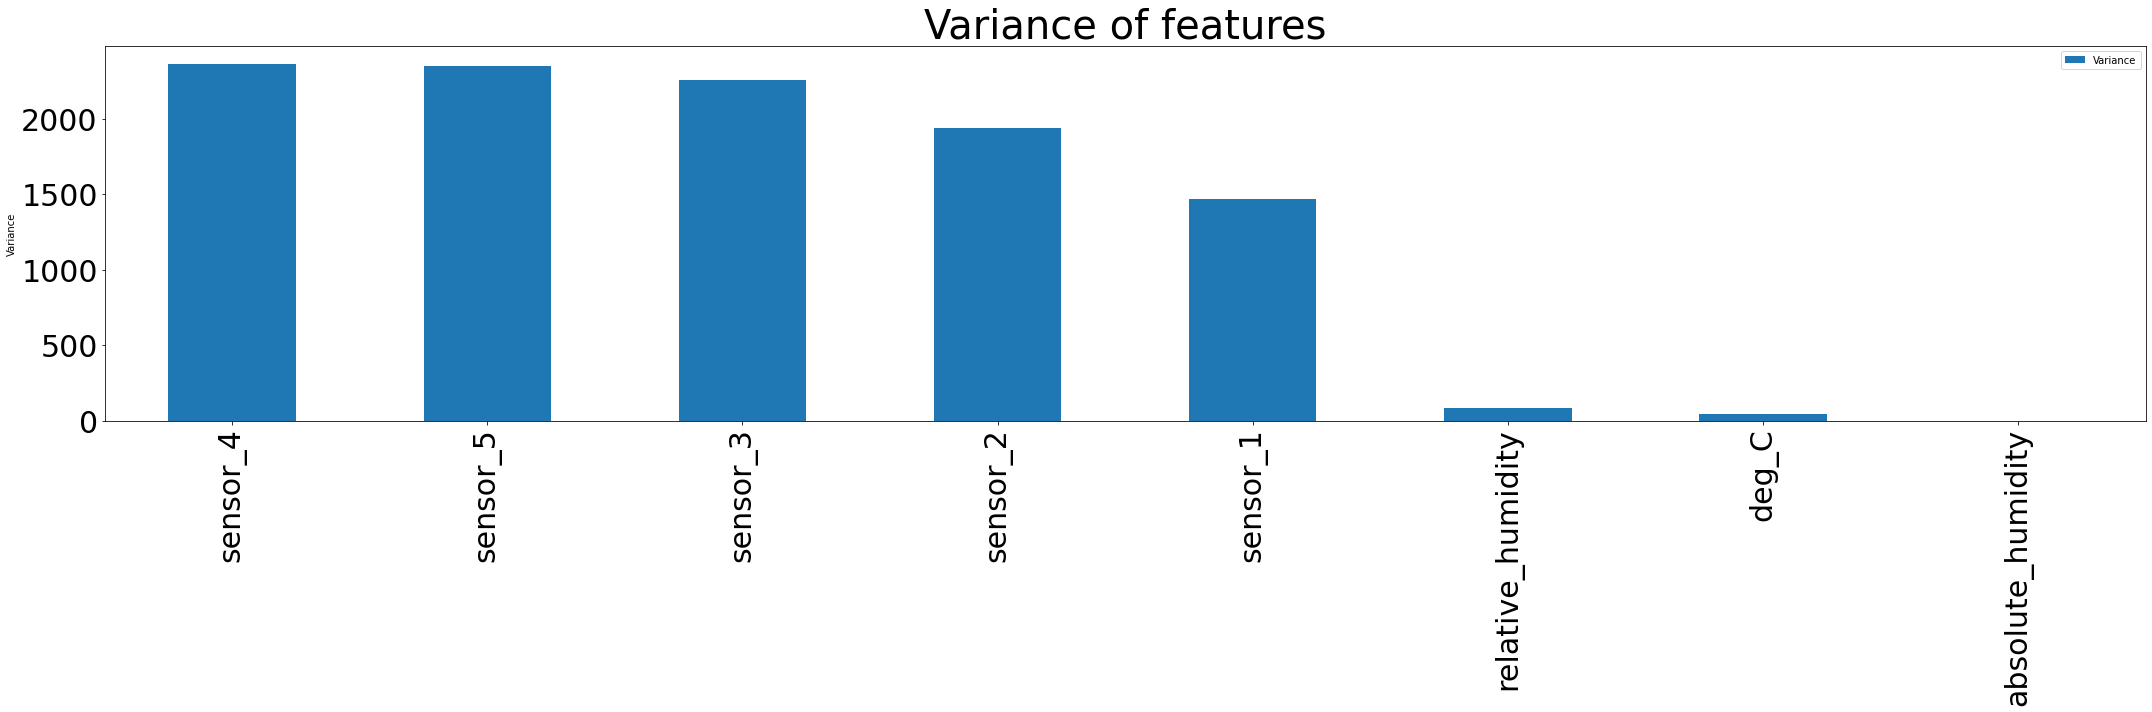

In [33]:
fig, ax = plt.subplots()
var.plot.bar(ax=ax,figsize=(30,10),fontsize=30)
ax.set_title('Variance of features',fontsize=40)
ax.set_ylabel('Variance')
fig.tight_layout()

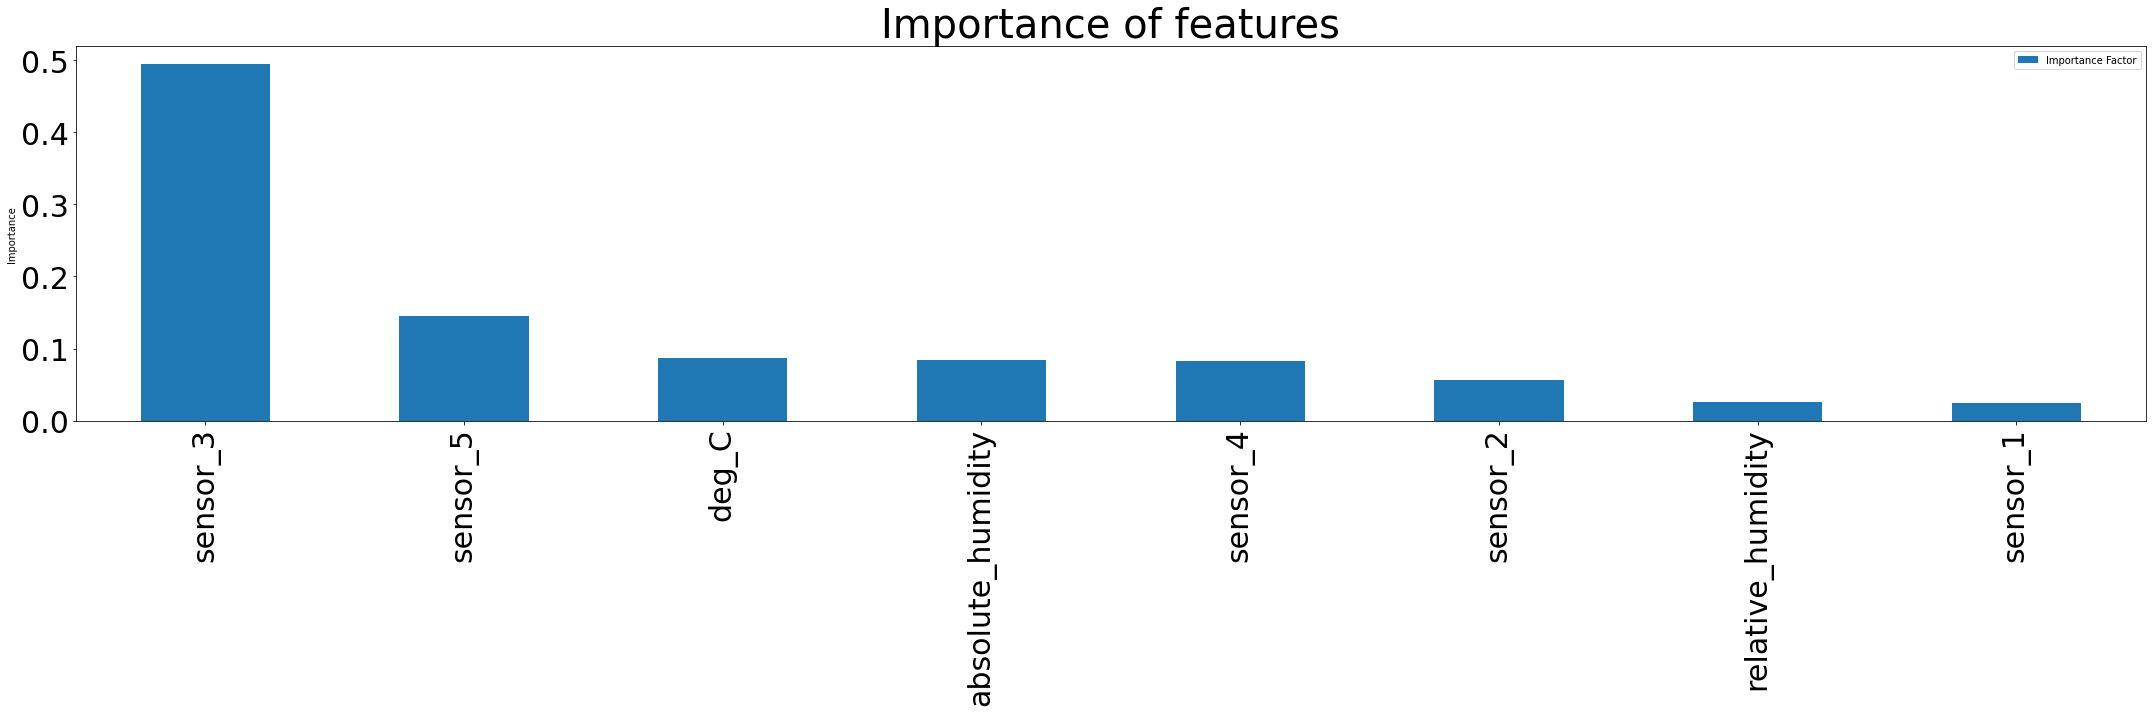

In [38]:
dtr = DecisionTreeRegressor()
dtr.fit(data,target)

importance = pd.DataFrame(dtr.feature_importances_,columns=['Importance Factor'],index=feature_name)
importance.sort_values('Importance Factor',ascending=False,axis=0,inplace=True)

fig, ax = plt.subplots()
importance.plot.bar(ax=ax,figsize=(30,10),fontsize=30)
ax.set_title('Importance of features',fontsize=40)
ax.set_ylabel('Importance')
fig.tight_layout()

In [56]:
def kde_plot(data, features, titleText, hue=None):

    L = len(features)
    nrow = int(np.ceil(L/4))
    ncol = 5
    remove_last = (nrow * ncol) - L

    fig, axs = plt.subplots(nrow, ncol, figsize=(30, 60))
    fig.tight_layout()
    fig.set_facecolor('#e4e4e4')

    while remove_last > 0:
      axs.flat[-remove_last].set_visible(False)
      remove_last -= 1

    fig.subplots_adjust(top = 0.97)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9,  
                    wspace=0.4, 
                    hspace=0.4)
    i = 1
    for feature in features:
        plt.subplot(nrow, ncol, i)
        ax = sns.kdeplot(data[feature], color="m", shade=True, label="%.3f"%(data[feature].skew()))  
        ax = ax.legend(loc = "best")    
        plt.xlabel(feature, fontsize=25, fontweight = 'bold')
        plt.ylabel('Density', fontsize=25, fontweight = 'bold')
        i += 1

    plt.suptitle(titleText, fontsize = 38, fontweight = 'bold', color = 'navy')
    
    plt.show()


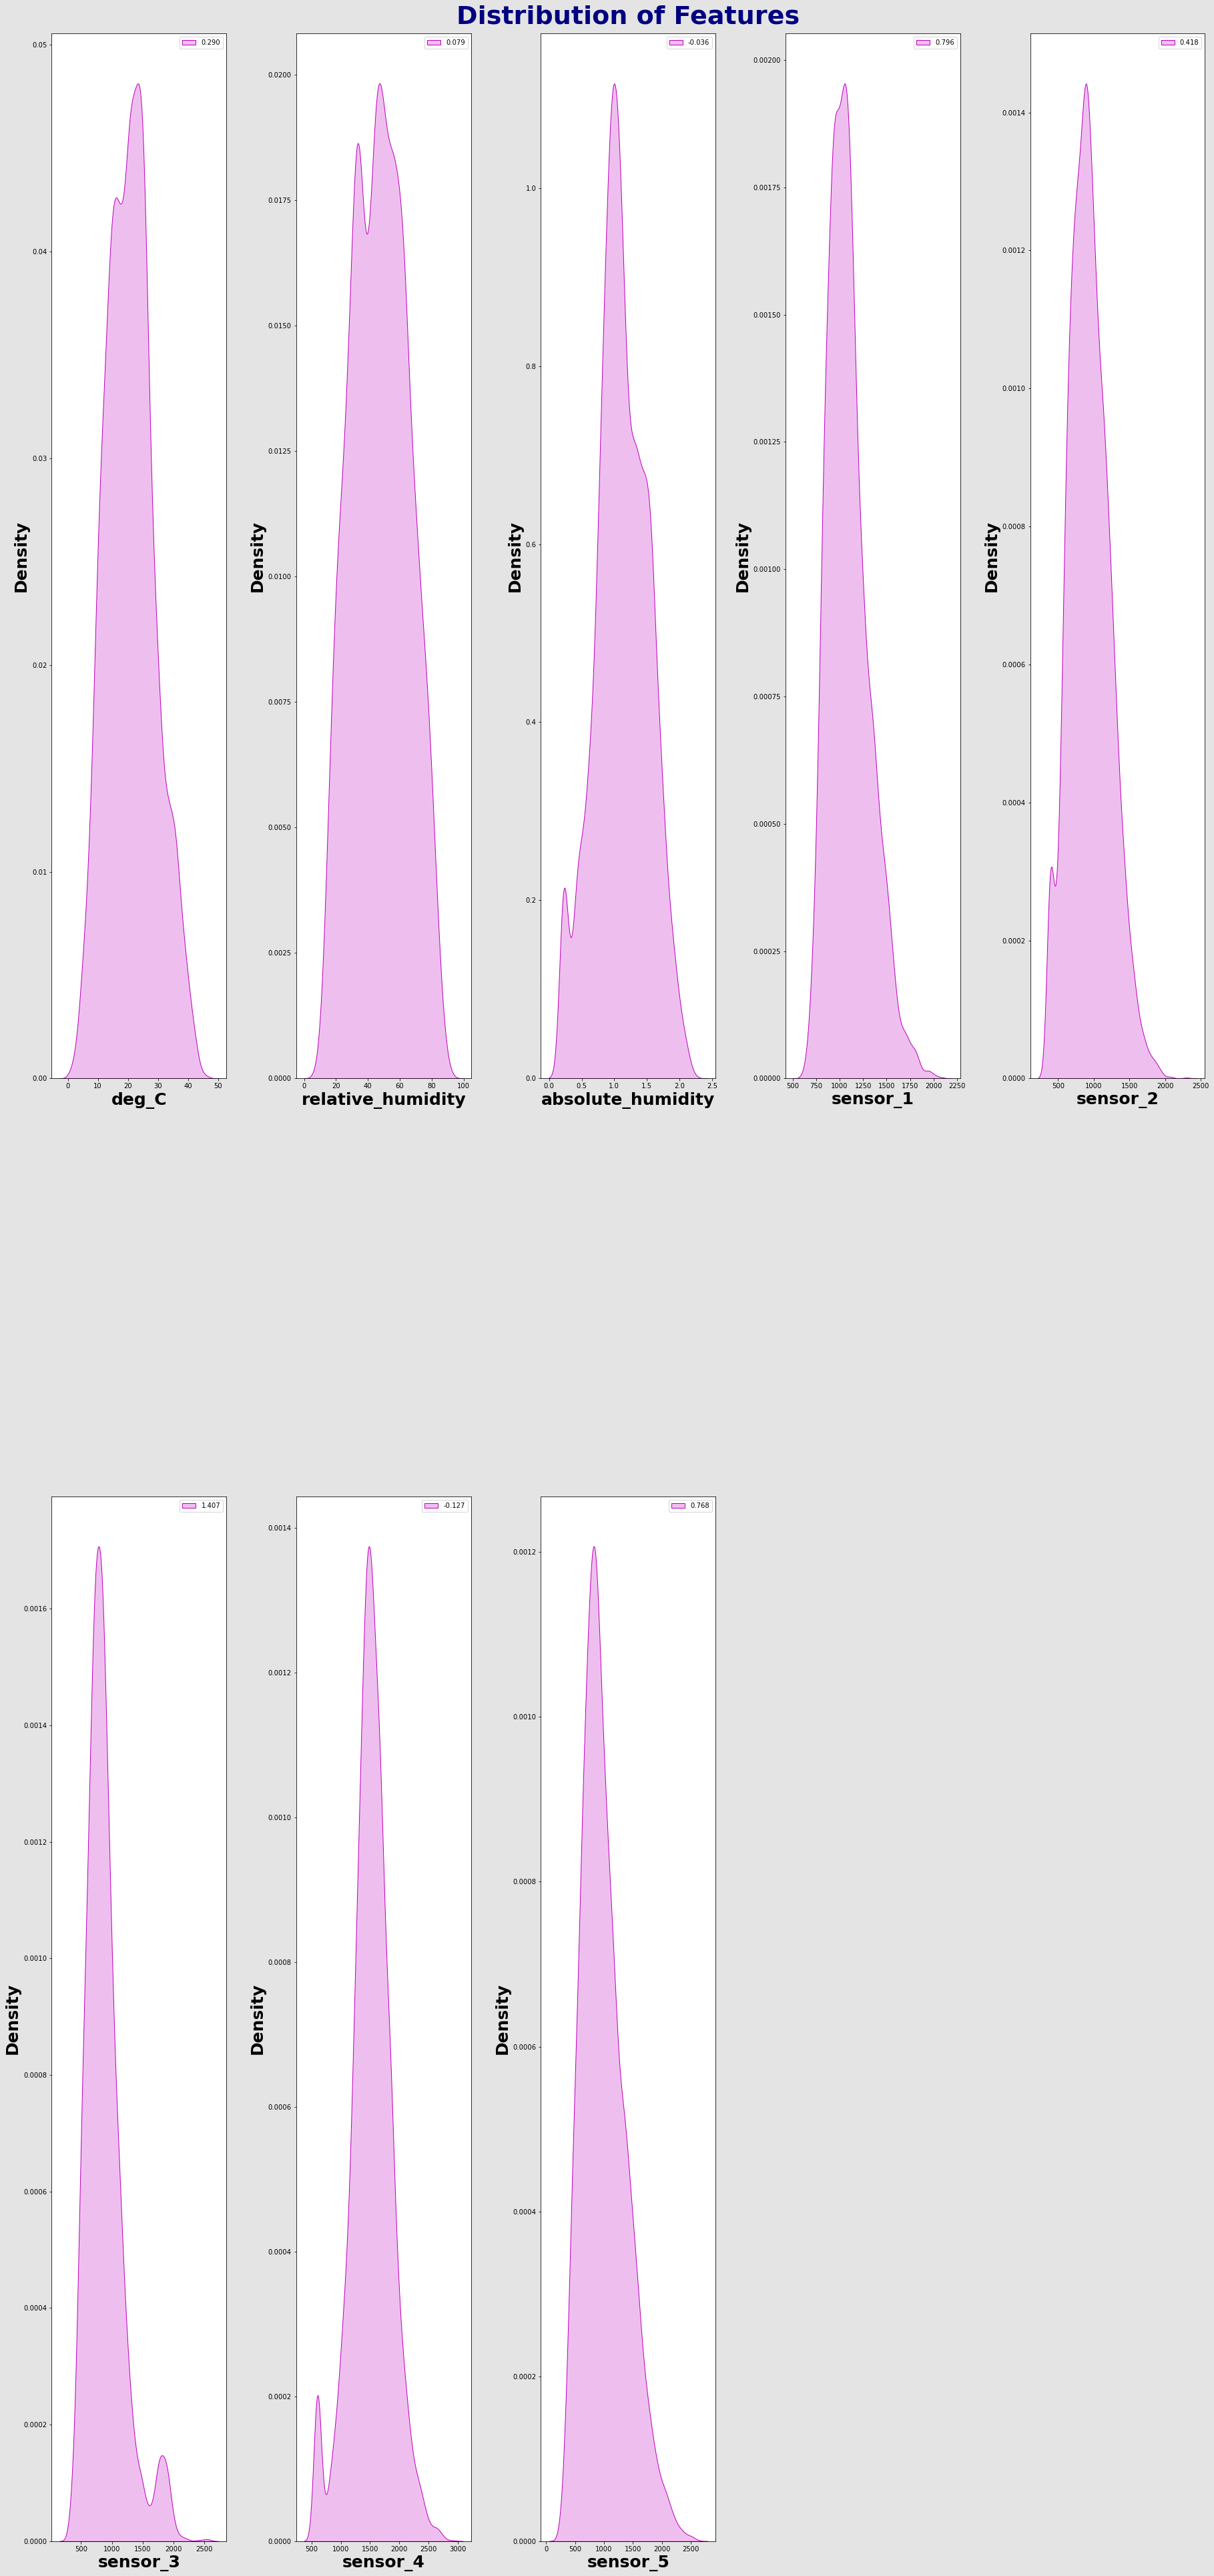

In [57]:
kde_plot(data, feature_name,'Distribution of Features', hue=None)

In [60]:
def box_plot(data, features, titleText, hue=None):

    L = len(features)
    nrow = int(np.ceil(L/4))
    ncol = 5
    remove_last = (nrow * ncol) - L

    fig, axs = plt.subplots(nrow, ncol, figsize=(40,30))
    fig.tight_layout()
    fig.set_facecolor('#e4e4e4')

    while remove_last > 0:
      axs.flat[-remove_last].set_visible(False)
      remove_last = remove_last - 1

    fig.subplots_adjust(top = 0.97)
    plt.subplots_adjust(left=0.1,
                    bottom=0.01, 
                    right=0.9,  
                    wspace=0.4, 
                    hspace=0.4)
    
    i = 1
    for feature in features:
        plt.subplot(nrow, ncol, i)
        v0 = sns.color_palette(palette = "pastel").as_hex()[2]
        ax = sns.boxplot(x = data[feature], color=v0, saturation=.75)   
        plt.xlabel(feature, fontsize=25, fontweight = 'bold')
        plt.ylabel('Values', fontsize=25, fontweight = 'bold')
        i += 1

    plt.suptitle(titleText, fontsize = 40, fontweight = 'bold', color = 'navy')
    plt.show()

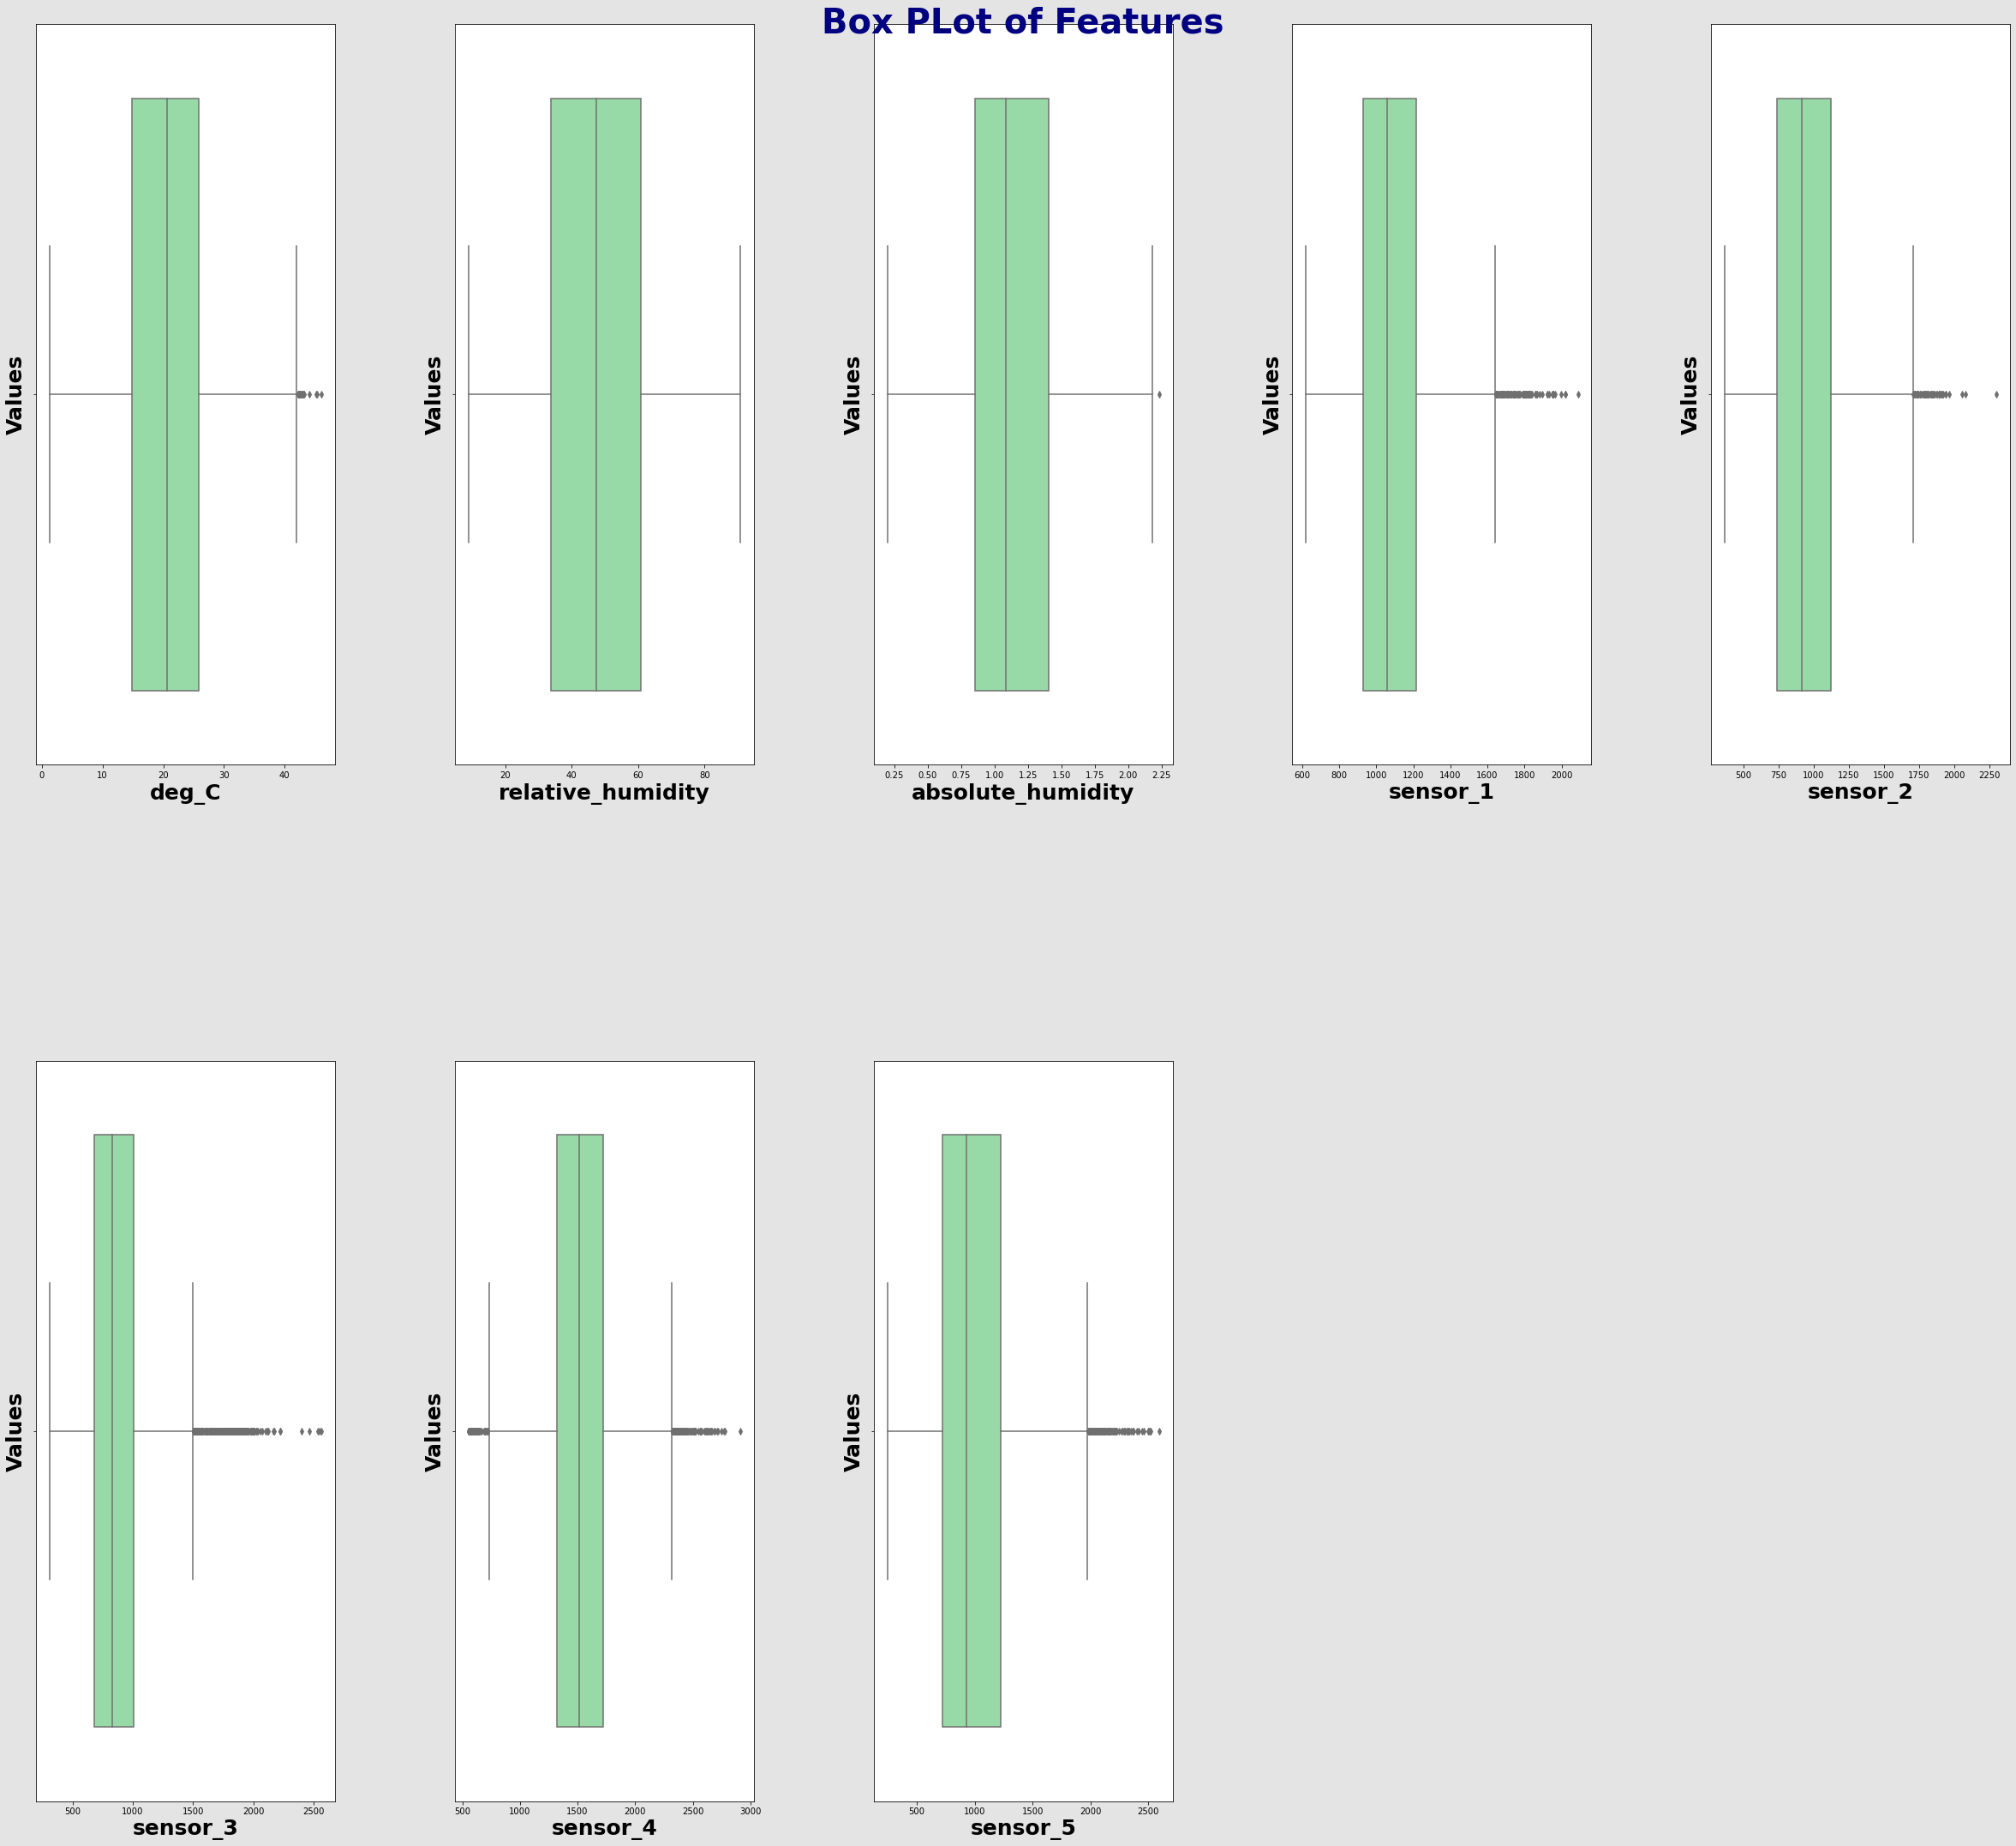

In [61]:
box_plot(data, feature_name,"Box PLot of Features", hue=None)

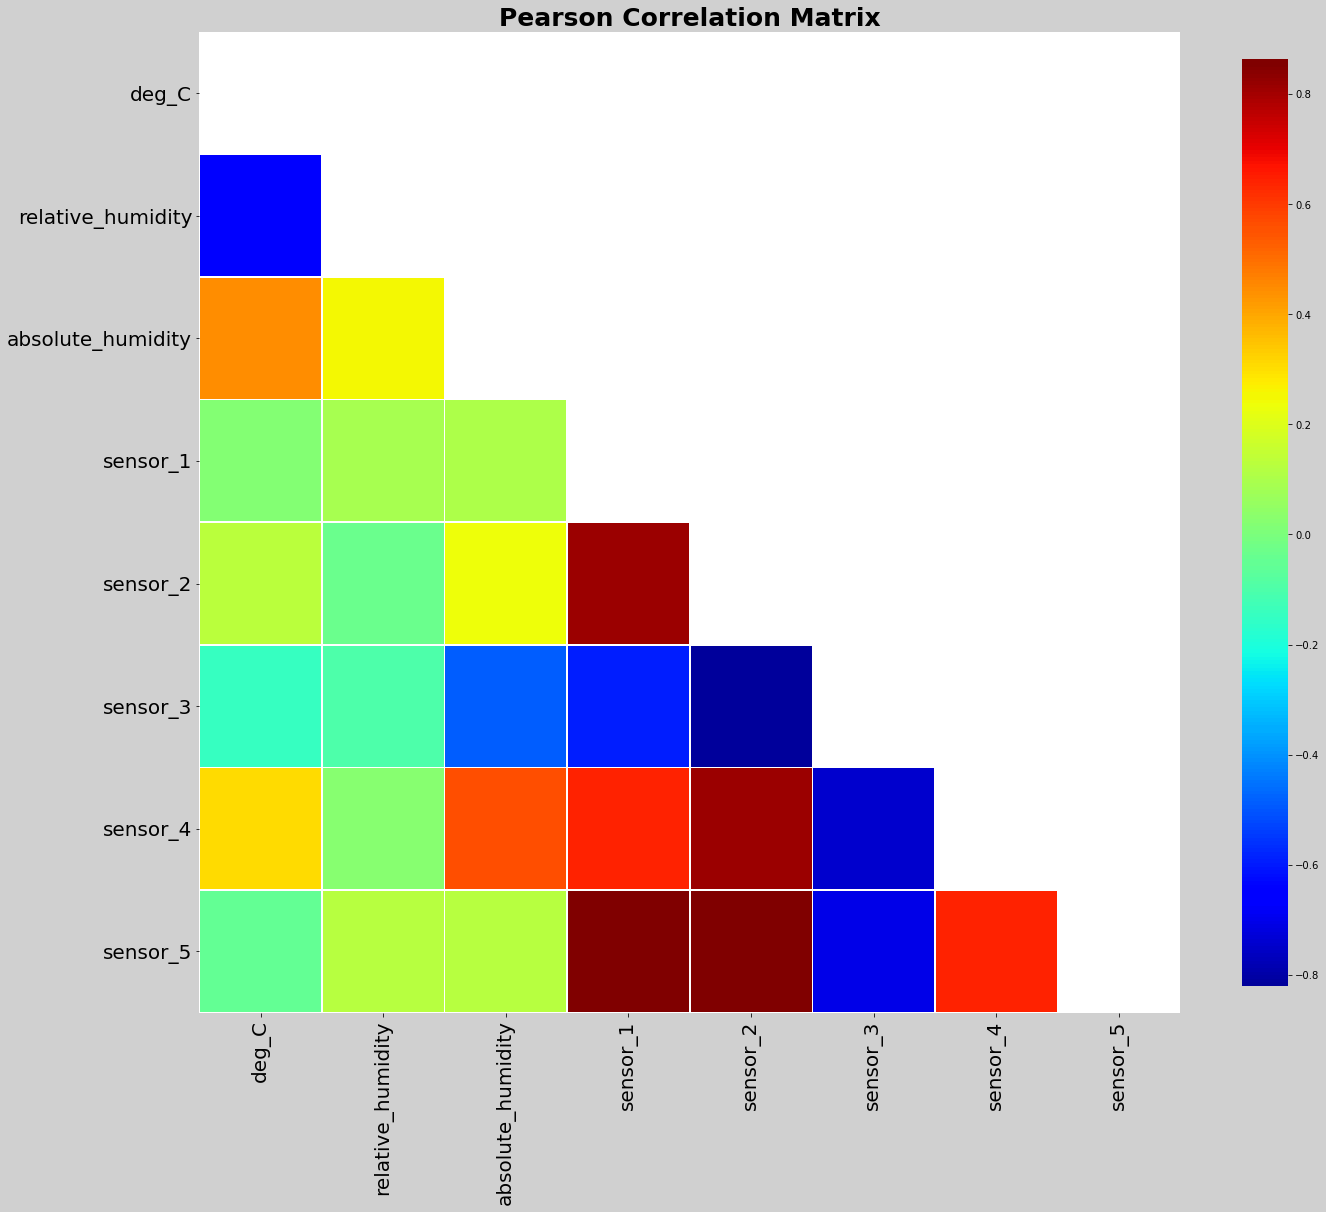

In [63]:
correlation = data.corr()

fig,ax = plt.subplots(1,1,figsize=(20,20))
plt.title('Pearson Correlation Matrix', fontweight='bold', fontsize=25)
fig.set_facecolor('#d0d0d0') 

mask = np.triu(np.ones_like(correlation, dtype = bool))
sns.heatmap(correlation,annot = False, center = 0, cmap = 'jet',mask=mask, linewidths = .5, square = True, cbar_kws = {"shrink": .70})
ax.set_xticklabels(ax.get_xticklabels(), fontfamily = 'sans', rotation = 90, fontsize = 20)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily = 'sans', rotation = 0, fontsize = 20)

plt.tight_layout()
plt.show()